# Fase 1: Exploración de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

### Exportar datos

In [47]:
dataHP=pd.read_csv("Video_Games_Sales.csv")
dataHP.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Buscamos las columnas que tienen faltantes o nulos

In [48]:
col_con_nan=[]

for col in dataHP.columns:
    porcentaje_faltante=dataHP[col].isnull().mean()
    if(porcentaje_faltante>0):
        col_con_nan.append(col)

col_con_nan

['Name',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

### Determinamos proporción de faltantes para cada columna con faltantes y mostrar una gráfica de barras con faltantes para cada columna

In [6]:
dataHP[col_con_nan].isnull().mean()

Name               0.000120
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

C:\Users\Luis\AppData\Local\Temp\ipykernel_20868\3946564376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Columna', y='ProporcionFaltante', data=faltantes_df, palette='viridis')


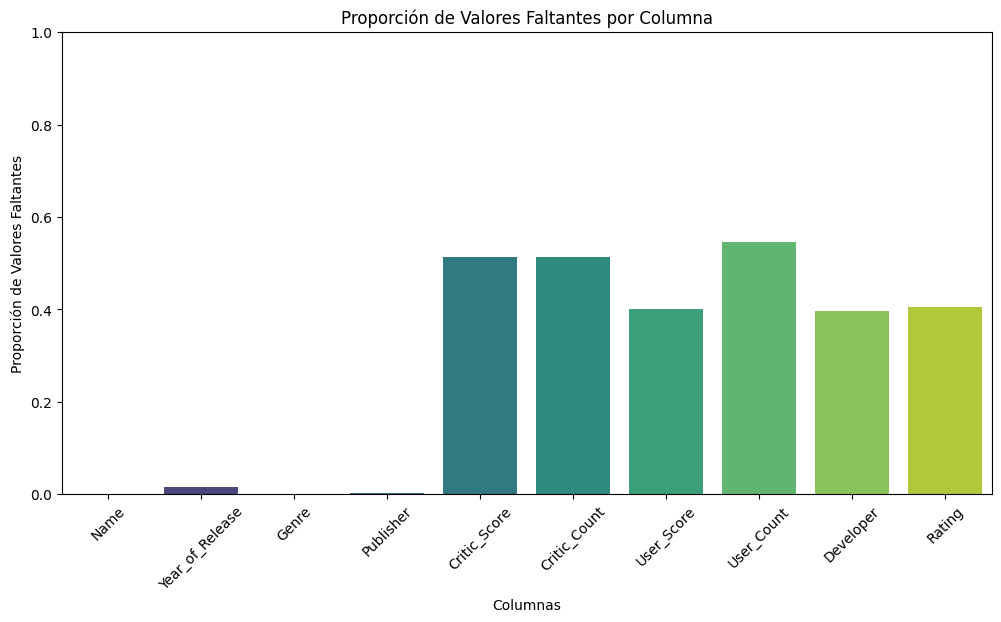

In [12]:
col_con_nan = [col for col in dataHP.columns if dataHP[col].isnull().mean() > 0]
proporciones_faltantes = dataHP[col_con_nan].isnull().mean()

faltantes_df = proporciones_faltantes.reset_index()
faltantes_df.columns = ['Columna', 'ProporcionFaltante']

plt.figure(figsize=(12, 6))
sns.barplot(x='Columna', y='ProporcionFaltante', data=faltantes_df, palette='viridis')

plt.title('Proporción de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Proporción de Valores Faltantes')
plt.xticks(rotation=45)
plt.ylim(0, 1)  

plt.show()

### 2. Efecto del CCA - Complete Case Analysis

In [7]:
cos_for_cca=[col for col in dataHP.columns if dataHP[col].isnull().mean()<0.06]
cos_for_cca

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [8]:
dataHP_cca = dataHP[cos_for_cca].dropna()
dataHP.shape, dataHP_cca.shape

((16719, 16), (16416, 10))

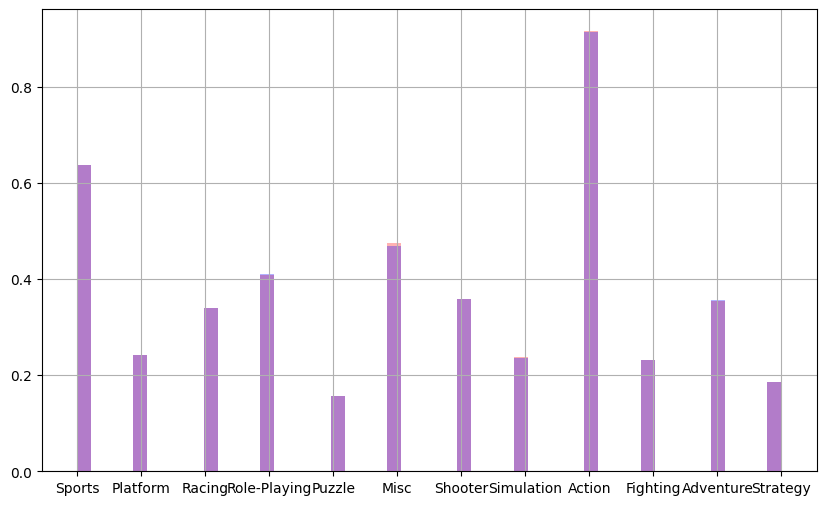

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

dataHP['Genre'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.3)
dataHP_cca['Genre'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.3)
plt.show()

In [19]:
dataHP.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

### Imputación por media y mediana

In [25]:
dataHP['Critic_Count'].isnull().mean()

0.5133082122136492

In [26]:
media = dataHP['Critic_Score'].mean()
mediana = dataHP['Critic_Score'].median()

print(f"Media: {media} y Mediana:{mediana}")

Media: 68.96767850559173 y Mediana:71.0


In [28]:
# Imputación de datos
dataHP['Critic_Mean']=np.round(dataHP['Critic_Score'].fillna(media), 0)
dataHP['Critic_Median']=dataHP['Critic_Score'].fillna(mediana)

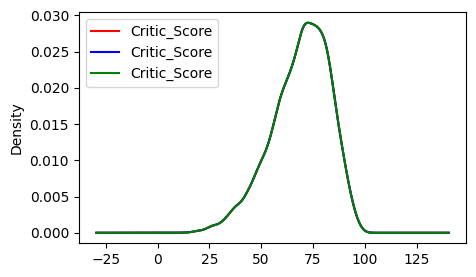

In [29]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

dataHP['Critic_Score'].plot.density(color='red', legend='Original')
dataHP['Critic_Score'].plot.density(color='blue', legend='Imput Media')
dataHP['Critic_Score'].plot.density(color='green', legend='Imput Mediana')
ax.legend()
plt.show()

In [30]:
print("Varianza Original", dataHP['Critic_Score'].var())
print("Varianza Media", dataHP['Critic_Mean'].var())
print("Varianza Mediana", dataHP['Critic_Median'].var())

Varianza Original 194.27243110213504
Varianza Media 94.54509288495329
Varianza Mediana 95.57674475302234


### Imputación de Variable categórica

In [31]:
dataHP['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
categoricas = []

for col in dataHP.columns:
    tipo = dataHP[col].dtype
    if(tipo == 'object'):
        categoricas.append(col)

In [34]:
catecoricas = [col for col in dataHP.columns if dataHP[col].dtype == 'object']
categoricas

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [35]:
dataCat = dataHP[['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']]
dataCat.head()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN


In [36]:
dataCat.isnull().mean()

Name          0.000120
Platform      0.000000
Genre         0.000120
Publisher     0.003230
User_Score    0.400981
Developer     0.396136
Rating        0.404869
dtype: float64

In [39]:
dataCat['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

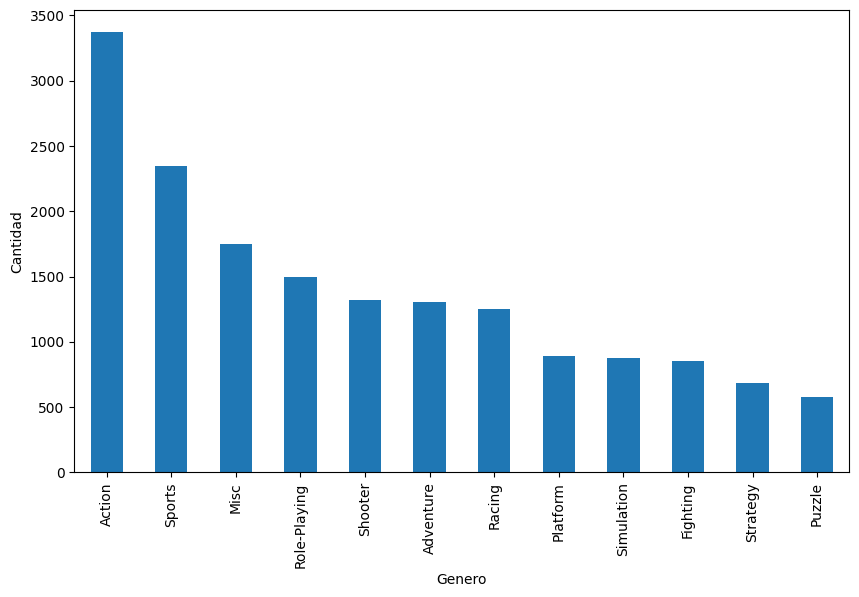

In [40]:
plt.figure(figsize=(10,6))
dataCat['Genre'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()

TypeError: no numeric data to plot

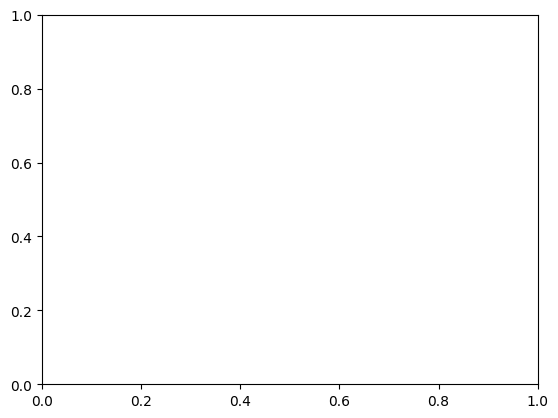

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataCat[dataCat['Genre']== 'Action']['User_Score'].plot(kind='kde', ax=ax, label='TA/TO')
#dataCat[dataCat['Genre']== 'Direct']['stays_in_week_nights'].plot(kind='kde', ax=ax, label='Direct')
#dataCat[dataCat['Genre']== 'Corporate']['stays_in_week_nights'].plot(kind='kde', ax=ax, label='Corporate')
#dataCat[dataCat['Genre']== 'GDS']['stays_in_week_nights'].plot(kind='kde', ax=ax, label='GDS')
#dataCat[dataCat['Genre']== 'Undefined']['stays_in_week_nights'].plot(kind='kde', ax=ax, label='Undefined')

plt.legend()
plt.show()

### Codificación de variables categóricas

In [50]:
dataCE = dataHP[['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']]
dataCE.head()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN


In [51]:
dataCE['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [52]:
pd.get_dummies(dataCE)

,Name_ Beyblade Burst,Name_ Fire Emblem Fates,Name_ Frozen: Olaf's Quest,Name_ Haikyu!! Cross Team Match!,Name_ Tales of Xillia 2,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//G.U. Vol.3//Redemption,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
dataCE['Genre'].value_counts(ascending=False)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

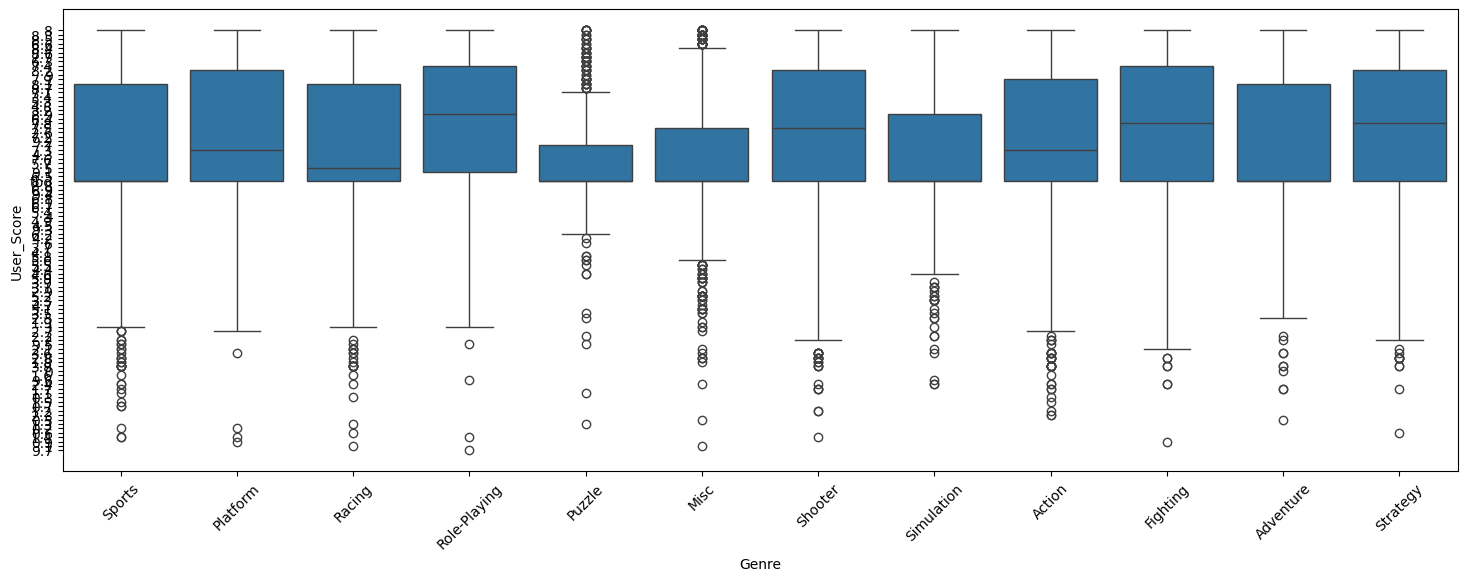

In [54]:
plt.subplots(figsize=(18,6))

lead=dataCE['User_Score']
nbh=dataCE['Genre']
sns.boxplot(x=nbh, y=lead)
plt.xticks(rotation=45)
plt.show()

Codificación de las variables

In [55]:
nbh_freq_dict = dataCE['Genre'].value_counts(ascending=False).to_dict()

In [56]:
dataCE['Genre'] = dataCE['Genre'].map(nbh_freq_dict)

C:\Users\Luis\AppData\Local\Temp\ipykernel_20868\4171411720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Genre'] = dataCE['Genre'].map(nbh_freq_dict)


In [57]:
def frequency_encoding_procedure(data_serie):
    freq_dict = data_serie.value_counts(ascending=False).to_dict()
    return data_serie.map(freq_dict)

In [58]:
for col in dataCE.columns:
    dataCE[col] = frequency_encoding_procedure(dataCE[col])

C:\Users\Luis\AppData\Local\Temp\ipykernel_20868\879767652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE[col] = frequency_encoding_procedure(dataCE[col])
C:\Users\Luis\AppData\Local\Temp\ipykernel_20868\879767652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE[col] = frequency_encoding_procedure(dataCE[col])
C:\Users\Luis\AppData\Local\Temp\ipykernel_20868\879767652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

## Parte 2 del Notebook

### Determinación de categoricas y continuas

In [59]:
import scipy.stats as stats

In [60]:
def get_variables_scale(dataset):
       categoricas = [col for col in dataHP.columns if dataHP[col].dtype == 'object']
       continuas = [col for col in dataHP.columns if dataHP[col].dtype in ['float64', 'int64'] and len(dataHP[col].unique()) > 30]
       discretas = [col for col in dataHP.columns if dataHP[col].dtype in ['float64', 'int64'] and len(dataHP[col].unique()) <= 30]

       return categoricas, continuas, discretas

In [61]:
cat, cont, disct = get_variables_scale(dataHP)

In [62]:
cont

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Count']

In [63]:
def plot_ouliers_analysis(dataset, col):
    plt.figure(figsize=(10,6))
    
    print(col)
    plt.subplot(131)
    sns.histplot(dataset[col], bins=30)
    plt.title("Densidad-Histograma")

    plt.subplot(132)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("QQ-Plot")

    plt.subplot(133)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")


    plt.show()

Year_of_Release


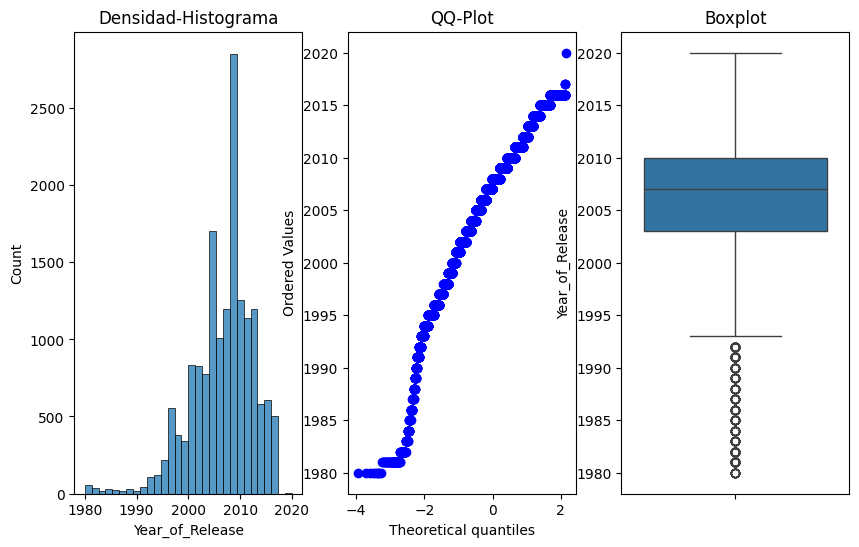

NA_Sales


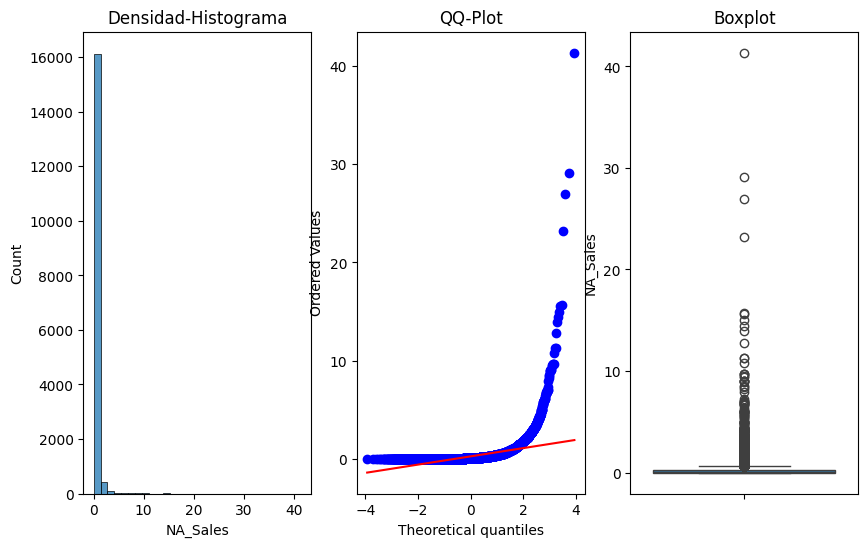

EU_Sales


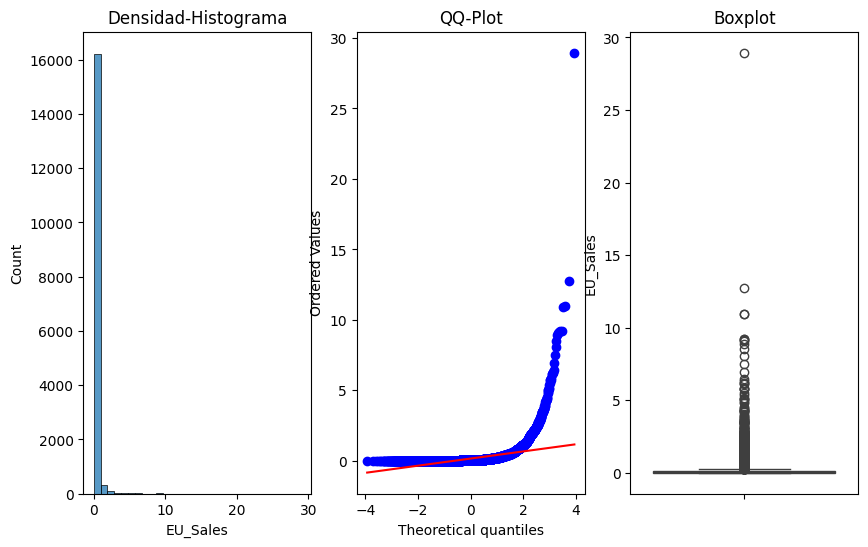

JP_Sales


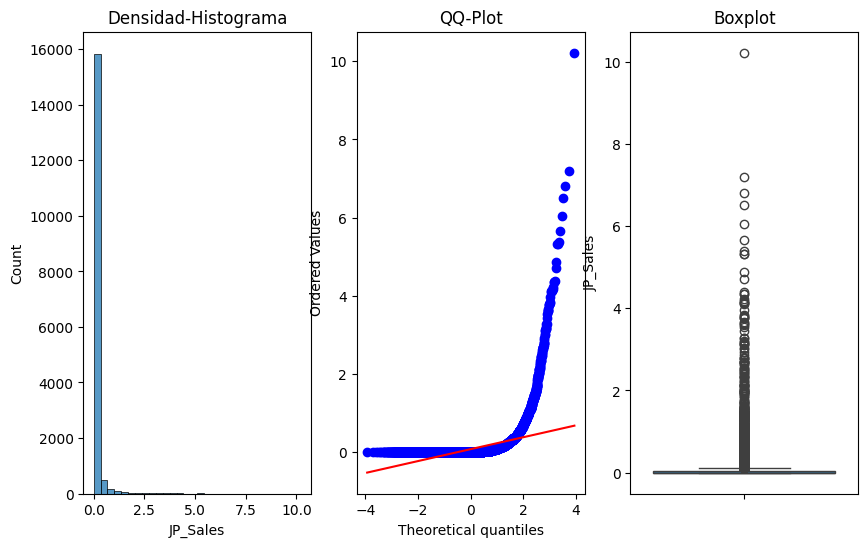

Other_Sales


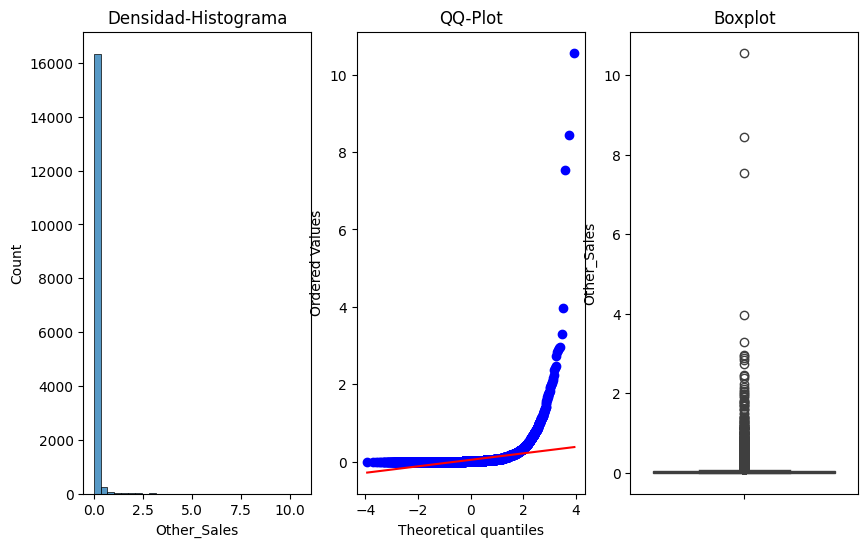

Global_Sales


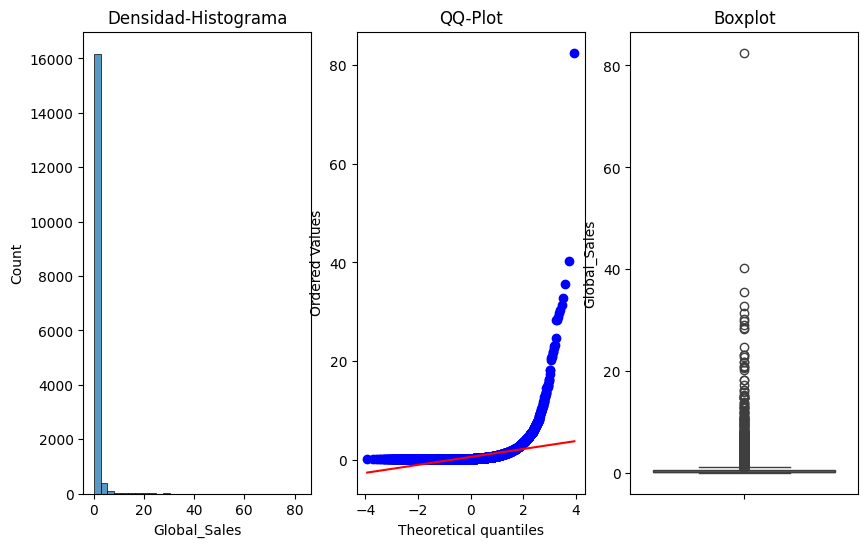

Critic_Score


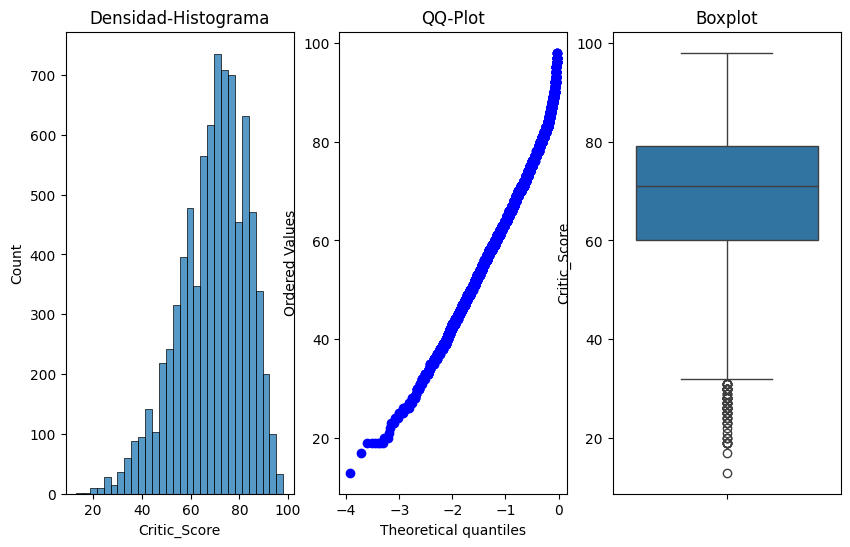

Critic_Count


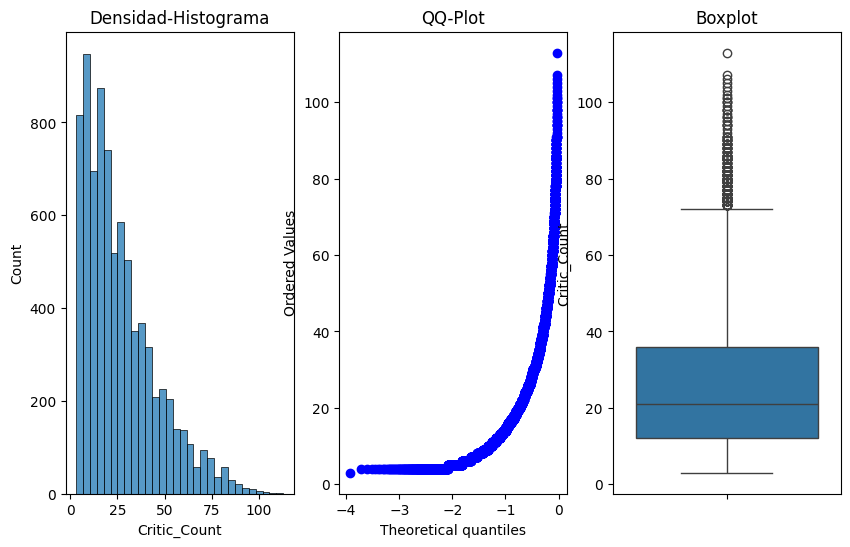

User_Count


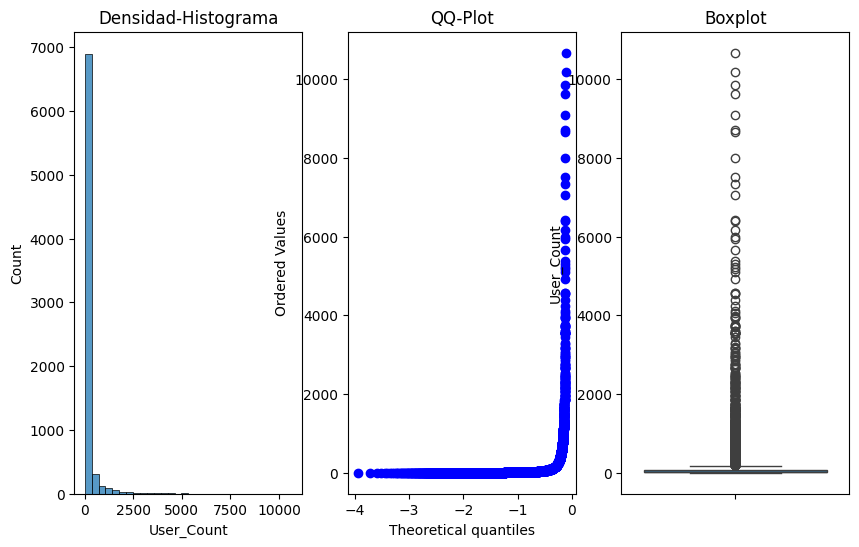

In [64]:
for col in cont:
    plot_ouliers_analysis(dataHP, col)

Variable Global_Sales

In [66]:
IQR = dataHP['Global_Sales'].quantile(0.75)-dataHP['Global_Sales'].quantile(0.25)
LI = dataHP['Global_Sales'].quantile(0.25)-(1.75*IQR)
LS = dataHP['Global_Sales'].quantile(0.75) + (1.75*IQR)

In [67]:
IQR, LI, LS

(0.41, -0.6575, 1.1875)

Global_Sales


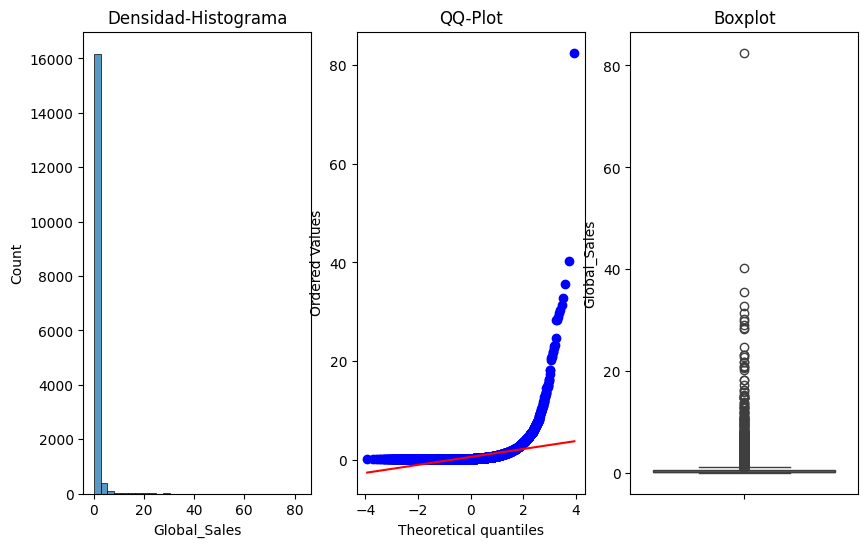

In [68]:
plot_ouliers_analysis(dataHP, 'Global_Sales')

Tratamiento Outliers

In [69]:
dataHP['Global_Sales_capp'] = np.where(dataHP['Global_Sales']>LS,LS,
        np.where(dataHP['Global_Sales']<LI,LI,
                 dataHP['Global_Sales'])

)

Global_Sales_capp


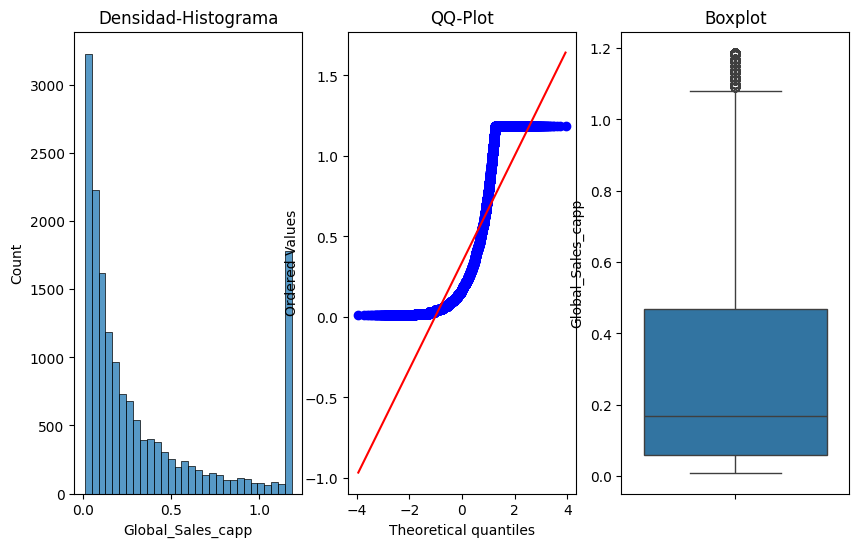

In [70]:
plot_ouliers_analysis(dataHP, 'Global_Sales_capp')

In [71]:
def get_outliers_limits(dataHP, col):
    IQR = dataHP[col].quantile(0.75)-dataHP[col].quantile(0.25)
    LI = dataHP[col].quantile(0.25)-(1.75*IQR)
    LS = dataHP[col].quantile(0.75) + (1.75*IQR)

    return LI, LS

In [72]:
LI, LS =get_outliers_limits(dataHP, 'Global_Sales_capp')
LI, LS

(-0.6575, 1.1875)

Transformación de variables

In [73]:
continuas = [col for col in dataHP.columns if(dataHP[col].dtype in ['float64', 'int64']) and (len(dataHP[col].unique())<=30)]
continuas

[]

In [74]:
discretas = [col for col in dataHP.columns if(dataHP[col].dtype in ['float64', 'int64']) and (len(dataHP[col].unique())<=30)]
discretas

[]

In [75]:
def plot_density_qq(df, variable):
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()

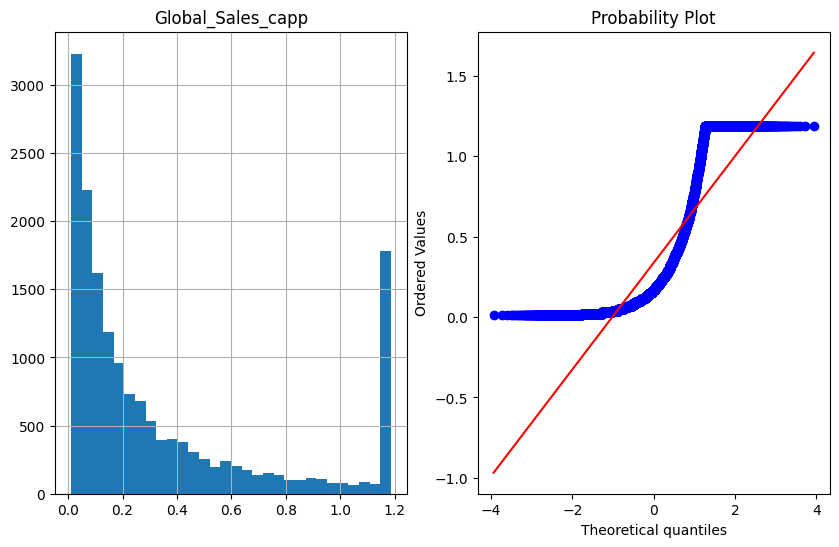

In [76]:
col="Global_Sales_capp"
plot_density_qq(dataHP, col)

In [77]:
dataHP['Global_Sales_capp'].mean()

0.33710494048687123

In [78]:
dataHP['Global_Sales_capp'].std()

0.37791528047108286

#### Transformación polinomial de orden 2

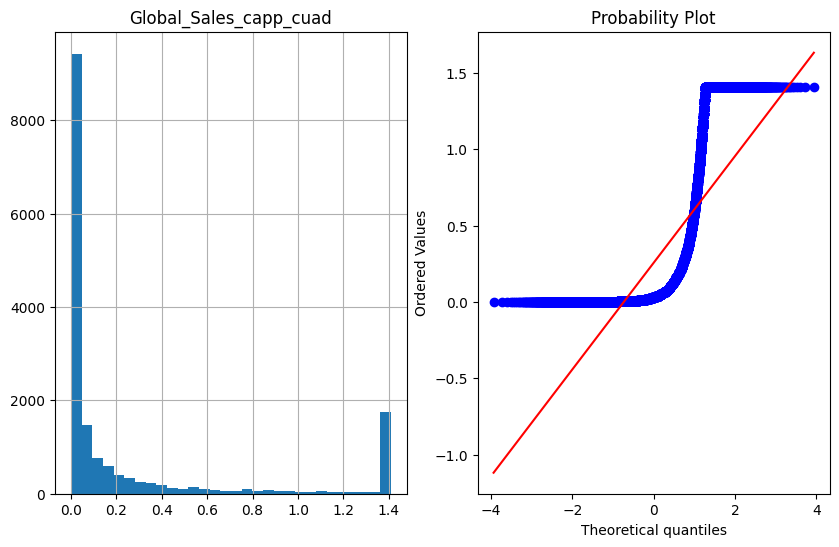

In [79]:
dataHP[col + '_cuad']=(dataHP[col])**2
plot_density_qq(dataHP, col + '_cuad')

Boxcox

0.0783


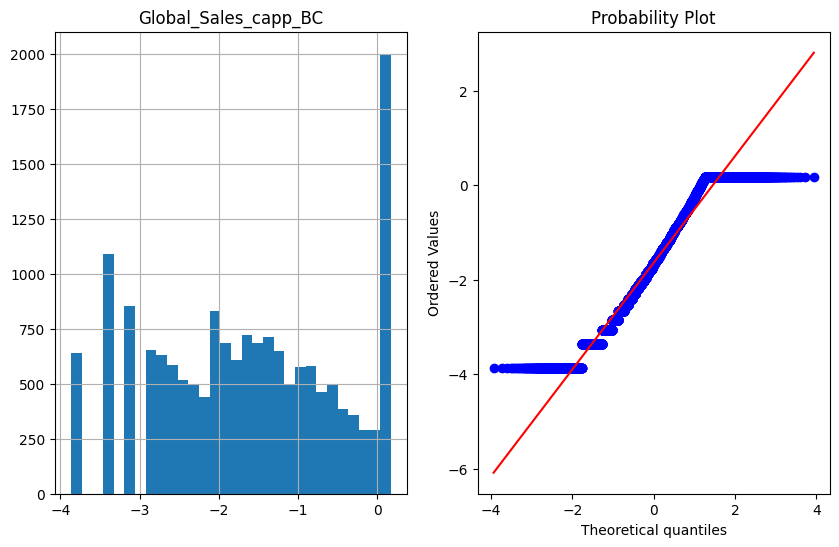

In [80]:
dataHP[col + '_BC'], lmbd=stats.boxcox(dataHP[col])
lmbd=str(round(lmbd,4))
print(lmbd)
plot_density_qq(dataHP, col + '_BC')

YeoJohnson

-2.8448


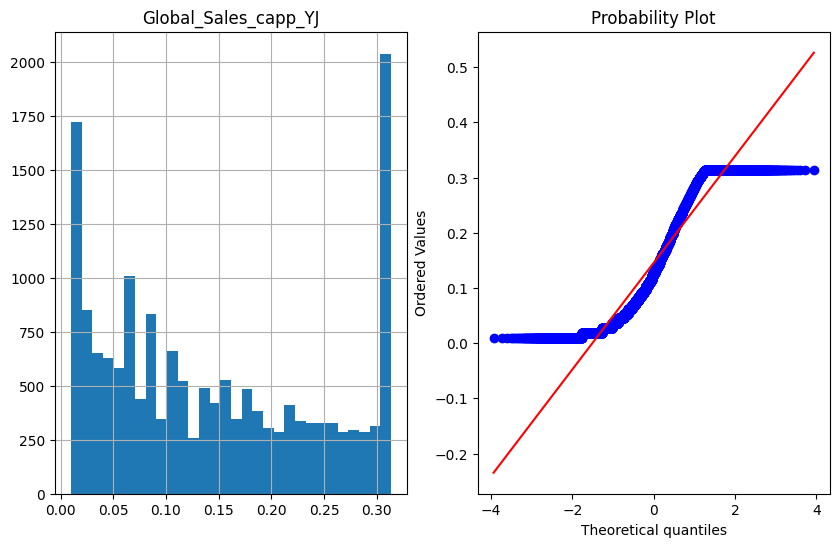

In [81]:
dataHP[col + '_YJ'], lmbd=stats.yeojohnson(dataHP[col])
lmbd=str(round(lmbd,4))
print(lmbd)
plot_density_qq(dataHP, col + '_YJ')

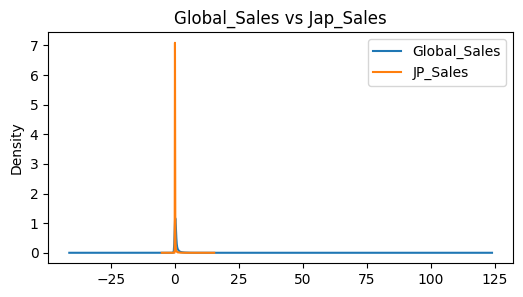

In [84]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataHP['Global_Sales'].plot(kind='kde', ax=ax, label='Global_Sales')
dataHP['JP_Sales'].plot(kind='kde', ax=ax, label='JP_Sales')
plt.title("Global_Sales vs Jap_Sales")

plt.legend()
plt.show()

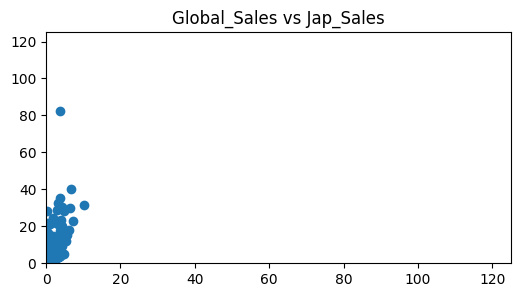

In [85]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=dataHP['JP_Sales'], y=dataHP['Global_Sales'])
plt.title("Global_Sales vs Jap_Sales")
plt.xlim((0,125))
plt.ylim((0,125))

plt.show()

### Scaling para Global Sales

In [86]:
min_lf = dataHP['Global_Sales'].min()
max_lf = dataHP['Global_Sales'].max()

dataHP['Global_Sales_minMaxScaled'] = (dataHP['Global_Sales'] - min_lf)/(max_lf - min_lf)

In [87]:
min_lf = dataHP['JP_Sales'].min()
max_lf = dataHP['JP_Sales'].max()

dataHP['Jap_Sales_minMaxScaled'] = (dataHP['JP_Sales'] - min_lf)/(max_lf - min_lf)

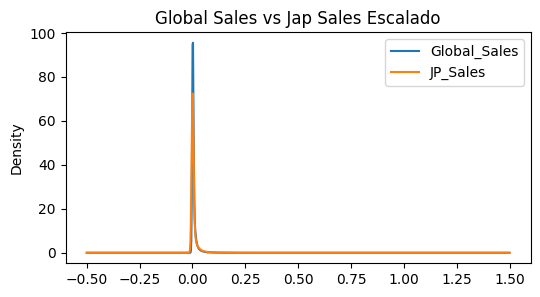

In [88]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataHP['Global_Sales_minMaxScaled'].plot(kind='kde', ax=ax, label='Global_Sales')
dataHP['Jap_Sales_minMaxScaled'].plot(kind='kde', ax=ax, label='JP_Sales')
plt.title("Global Sales vs Jap Sales Escalado")

plt.legend()
plt.show()

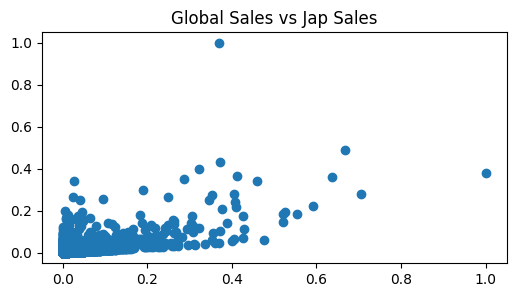

In [89]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=dataHP['Jap_Sales_minMaxScaled'], y=dataHP['Global_Sales_minMaxScaled'])
plt.title("Global Sales vs Jap Sales")

plt.show()